## KMeans using UMAP

### FOR churn FALSE

Import the required Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import umap  # For UMAP
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Load the Dataset, that Dataset contains churn column with FALSE value and covert the churn column as int type(because it is in Boolean)

In [4]:
df = pd.read_csv('churn_false.csv')
df['Churn'] = df['Churn'].astype(int)

In [5]:
numerical_cols = [
    'Account_Length', 'VMail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge', 
    'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls', 
    'Night_Charge', 'Intl_Mins', 'Intl_Calls', 'Intl_Charge', 'CustServ_Calls']
X = df[numerical_cols]

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### StandardScaler
- StandardScaler is used to normalize the data 
- so that each feature has a mean of 0 and a standard deviation of 1, which improves the performance of models

### Perform KMeans Clustering


In [12]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

- Initializes an empty list wcss(Within-Cluster Sum of Squares) to store the different numbers of clusters.
- Fits the KMeans model to the scaled data X_scaled.

### Elbow Plot
- we are finding out the optimal number of clusters for a KMeans clustering algorithm 
- By calculating the Within-Cluster Sum of Squares (WCSS) for different numbers of clusters (ranging from 1 to 10).
- By using the WCSS values we create a **ELBOW PLOT** from that plot we find the **ELBOW POINT** is considered the optimal number of clusters.

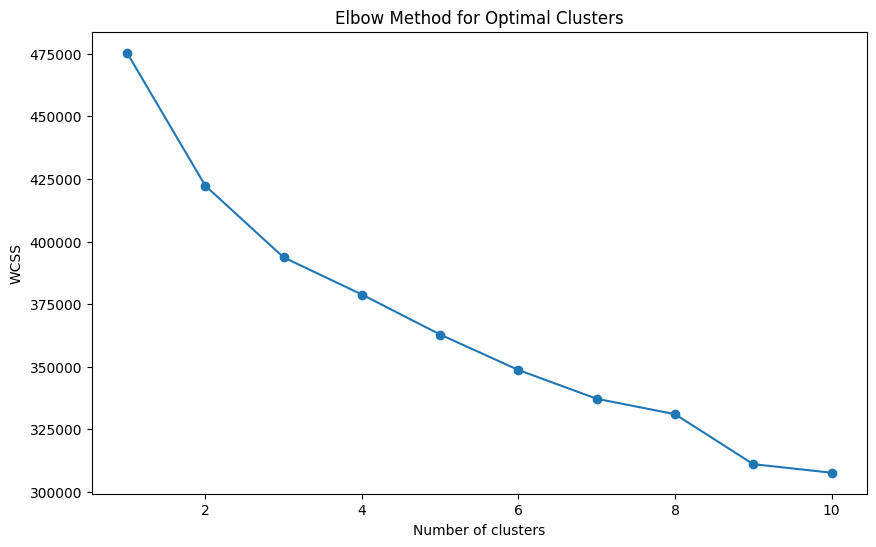

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

- From the Elbow Plot the optimal cluster is 3. the clusters are 0,1 and 2
- Assigns the predicted cluster labels to a new column named 'Cluster' in the DataFrame df

In [19]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

### Uniform Manifold Approximation and Projection
        UMAP is a dimensionality reduction technique used to reduce high-dimensional data to lower dimensions (like 2D or 3D) while preserving its structure and relationships. 


In [22]:
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

- Creates a UMAP model with 2 components (n_components=2) i.e the data will be reduced to 2 dimensions. 
- The random_state=42 it's for every time to run the code with the same random_state, you will get the same results.
- Fits the UMAP model to the scaled data (X_scaled) and transforms it and reducing the data's dimensionality from its original feature space to a 2-dimensional space. 
- The transformed data is stored in X_umap

In [24]:
df['UMAP1'] = X_umap[:, 0]
df['UMAP2'] = X_umap[:, 1]

Transform the UMAP data to Dataframe df
- (X_umap[:, 0])-> it refers the First dimension data of the UMAP-transformed data and assigns it to a new column named 'UMAP1' in the DataFrame df.
- (X_umap[:, 1])-> it refers the Second dimension data of the UMAP-transformed data and assigns it to a new column named 'UMAP2' in the DataFrame df.


### Calculate CLV

In [29]:
df['CLV'] = df['Day_Charge'] + df['Eve_Charge'] + df['Night_Charge'] + df['Intl_Charge']

# Analyze average CLV for each cluster
cluster_clv = df.groupby('Cluster')['CLV'].mean()
print("\nAverage CLV for each cluster:")
print(cluster_clv)


Average CLV for each cluster:
Cluster
0    65.799674
1    97.830945
2    98.280769
Name: CLV, dtype: float64


Customer Lifetime Value
- df['CLV']-It Stores the CLV for each customer by summing up their charges across different times of the day (Day, Evening, Night) and international charges.
- df.groupby('Cluster')['CLV'].mean() groups the data by the 'Cluster' column and calculates the mean CLV for each cluster and store it in cluster_clv and prints  the average CLV for each cluster

In [32]:
df['Cluster_Color'] = df['Cluster'].map({
    0: 'Potential High Value Customers', 
    1: 'Potential Low Value Customers', 
    2: 'Potential Medium Value Customers'
})

- High Potential: Clusters with high average CLV, indicating customers who are likely to generate substantial revenue and are ideal targets for upselling opportunities.
- Medium Potential: Clusters with moderate average CLV, representing customers who have potential for upselling but may require more targeted strategies to maximize their value.
- Low Potential: Clusters with low average CLV, indicating customers who generate less revenue and may have limited opportunities for upselling.

  - 0 is mapped to 'Potential High Value Customers'
  - 1 is mapped to 'Potential Low Value Customers'
  - 2 is mapped to 'Potential Medium Value Customers'

### Visualize the clusters using UMAP

Here we plot a Scatter plot which takes UMAP1 as X-axis and UMAP2 as Y-axis and we set a color for cluster

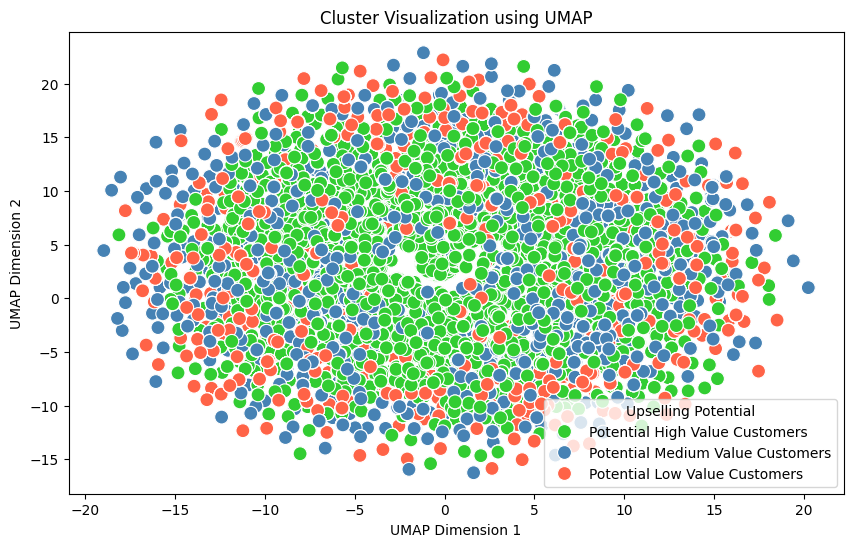

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='UMAP1', y='UMAP2', hue='Cluster_Color', data=df, 
    palette=['#32CD32', '#4682B4', '#FF6347'], s=100
)
plt.title('Cluster Visualization using UMAP')
plt.xlabel('UMAP Dimension 1')   
plt.ylabel('UMAP Dimension 2')
plt.legend(title='Upselling Potential', loc='best')
plt.show()